# Exploratory Data Analysis on FIFA 19

## Purpose and goals:

1. Understand the variables
2. Clean dataset
3. Analyze relationships between variables
4. Get and extract valuable insights
5. Test underlying assumptions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('data/fifa_eda.csv')

In [2]:
# taking a look at the first five rows in the dataset

df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage\n(Pounds Weekly),Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [3]:
print("This dataset has {} rows and {} columns".format(df.shape[0], df.shape[1])) # stating the # of rows and columns
df.columns # accessing the column names

This dataset has 18207 rows and 18 columns


Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage\n(Pounds Weekly)', 'Preferred Foot',
       'International Reputation', 'Skill Moves', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Release Clause'],
      dtype='object')

In [4]:
# understanding the different values for each variable

df.nunique(axis = 0)

ID                          18207
Name                        17194
Age                            29
Nationality                   164
Overall                        48
Potential                      47
Club                          651
Value                         216
Wage\n(Pounds Weekly)         144
Preferred Foot                  2
International Reputation        5
Skill Moves                     5
Position                       27
Joined                         22
Contract Valid Until           35
Height                         22
Weight                         58
Release Clause               1245
dtype: int64

In [5]:
# summarizing the mean, count, standard deviation, min, max for numeric variables

df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) # applying a regular format instead of scientific notation

,ID,Age,Overall,Potential,Value,Wage\n(Pounds Weekly),International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


In [6]:
df = df.rename({'Wage\n(Pounds Weekly)' : 'Weekly Wage'}, axis = 1) # renaming the wage column

## There is a large disparity between the min and max on the wage side

## --> 0 to 565

### Taking a deeper dive to see the unique values in the Weekly Wage column

In [7]:
df['Weekly Wage'].unique() # taking a look at a list of the different values under Weekly Wage

array([565, 405, 290, 260, 355, 340, 420, 455, 380,  94, 205, 125, 285,
       225, 145, 240, 315, 200, 130, 300, 215, 100, 255, 165, 265, 160,
       150, 245, 110,  77, 115, 210, 195, 230, 250, 135, 155, 180, 175,
       190, 185,  21,  82,  73,  92,  88,  96, 170,  66, 235,  28, 105,
        38,  81,  57,  15,  63,  22,  84, 120,  90,  72,  93,  45,  74,
        51,  42,  31,  75,  25, 140,  41,  78,  53,  95,  80,  43,  60,
        85,  64,  67,  18,  70,  91,  20,  49,  87,  86,  26,  29,  55,
        35,  33,  56,  30,  11,  59,  23,  46,  39,  32,  36,  98,  54,
        68,  58,  27,  40,  44,  19,   1,  61,  50,  99,  17,  52,  62,
        12,  10,  71,  14,  76,  48,  65,  69,  24,  34,  16,  37,  47,
        89,   0,  97,  79,  13,  83,   6,   3,   9,   8,   7,   4,   2,
         5], dtype=int64)

In [8]:
# checking for null values
# club, value and contract valid are in triple digits for null values

df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Weekly Wage                   0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [9]:
df = df.dropna(axis = 0) # removing any rows with null values

In [10]:
df.isnull().sum() # now the dataset looks like this

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Weekly Wage                 0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [11]:
# checking the data type for each attribute 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17907 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17907 non-null  int64  
 1   Name                      17907 non-null  object 
 2   Age                       17907 non-null  int64  
 3   Nationality               17907 non-null  object 
 4   Overall                   17907 non-null  int64  
 5   Potential                 17907 non-null  int64  
 6   Club                      17907 non-null  object 
 7   Value                     17907 non-null  float64
 8   Weekly Wage               17907 non-null  int64  
 9   Preferred Foot            17907 non-null  object 
 10  International Reputation  17907 non-null  float64
 11  Skill Moves               17907 non-null  float64
 12  Position                  17907 non-null  object 
 13  Joined                    17907 non-null  int64  
 14  Contra

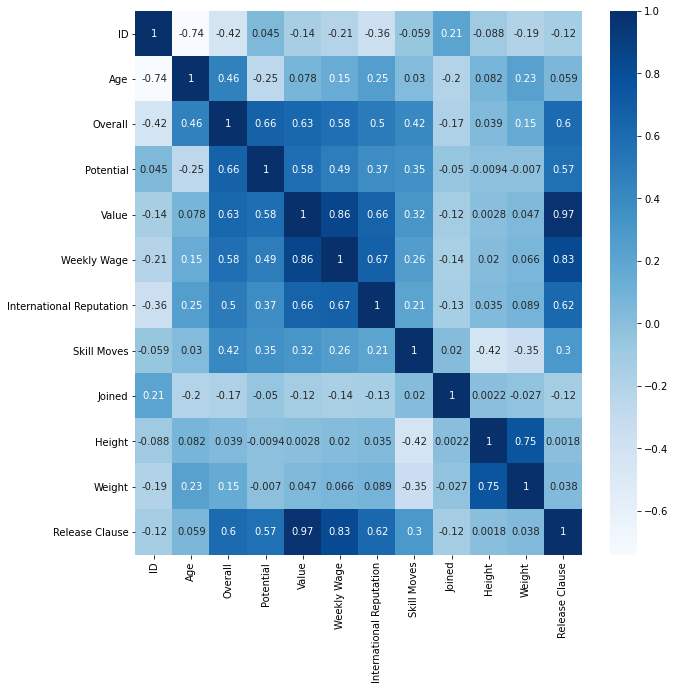

In [12]:
# checking the correlation between variables

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues'); # building the heatmap

# Exploration

## Questions to answer:

### International

1. How many unique countries compose the top 50 rated players?

    a) Are there countries that stand out amongst the rest?
    
2. Right footed vs. left footed?
3. For each country's top 20 rated players, what is the average age?

In [13]:
# taking a look at my dataset before exploring

df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weekly Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [14]:
# passing a window function in dense rank that will rank the players in a descending manner based on overall rating
# important to mention: if there are two variables with same overall rating, they will get the same ranking
# passing the astype to switch the ranking from float to integer

df['player_rank'] = df['Overall'].rank(method = 'first', ascending = False).astype(int)

In [15]:
# checking the first five rows to ensure that the ranking worked

df['player_rank'].unique()

array([    1,     2,     3, ..., 17905, 17906, 17907])

In [16]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weekly Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,player_rank
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0,1
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0,2
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0,3
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0,4
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0,5


In [17]:
# making a copy of the original dataset to explore the data further

dfn = df.copy()

#### Question 1: How many unique countries compose the top 50 rated players?

## Assumption Top 5:

1. France
2. Brazil
3. Belgium
4. Germany
5. Spain

In [18]:
# for the time being, removing all columns that are not necessary and filtering by the top 50 rated players overall

top_players = dfn[dfn['player_rank'] <= 50][['Name', 'Nationality', 'Club' ,'Overall', 'Weekly Wage', 'Preferred Foot']] 

In [19]:
# breaking down the number of players by country, their average weekly wage
# sorted by total_players descending

countries = top_players.groupby('Nationality').agg({'Overall': 'count', 'Weekly Wage': 'mean'}).reset_index().sort_values(by = 'Overall', ascending = False).rename({'Overall': 'total_players', 'Weekly Wage': 'Avg. Weekly Wage'}, axis = 1)
countries.head(5)

,Nationality,total_players,Avg. Weekly Wage
17,Spain,6,300.833333
9,France,6,172.500000
0,Argentina,5,289.000000
2,Brazil,5,273.000000
12,Italy,4,143.000000


## Comparing Assumptions to Data

### Assumptions                    

1. France                                              
2. Brazil                                                
3. Belgium                                             
4. Germany                                            
5. Spain     



### Results

1. Spain
2. France
3. Argentina
4. Brazil
5. Italy


### 3/5 countries were in the top 5

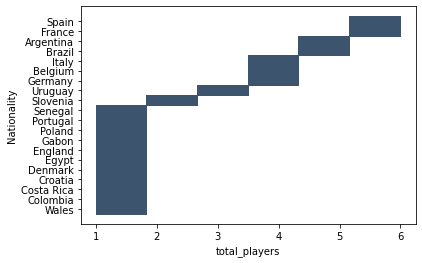

In [20]:
# building a histogram plot to visualize the breakdown of all unique countries and the total count of players

sns.histplot(x = countries['total_players'], y = countries['Nationality'], legend = True, element = 'step');

### Question 1: How many unique countries compose the top 50 rated players?

### Answer

In [53]:
# Understanding the number of unique countries that make up the top 50 rated players

print("{} countries compose the list for the top 50 players in FIFA 19.".format(top_players['Nationality'].nunique()))
print("{} countries compose the list for the top 100 players in FIFA 19.".format(top_hundred['Nationality'].nunique()))

20 countries compose the list for the top 50 players in FIFA 19.
29 countries compose the list for the top 100 players in FIFA 19.


## Question 2: Right footed vs. left footed?

+ Break down for the top 50 players and overall

+ Assumptions: There will be more right footers than left footers in both the Top 50 and the entire dataset

In [22]:
### Let's start with the top 50 players

right_footers = top_players['Preferred Foot'].value_counts()[0]
left_footers = top_players['Preferred Foot'].value_counts()[1]

In [23]:
print("In the Top 100, the preferred foot count breakdown is {} for right foot and {} for left foot".format(right_footers, left_footers))

In the Top 100, the preferred foot count breakdown is 36 for right foot and 14 for left foot


## Question 3: For each country's top 20 rated players, what is the average age?

+ Use a window function to rank the players by their rating, and rank them by country
+ Filter out Top players by country
+ Use groupby function to get the average age

### Assumption: The average age for 70% of countries will be between 25 and 28

In [24]:
# Grouping data by Nationality and overall, ascending by country and overall rating descending, using the cumulative count, we will be able to get the top 20 players by country
# For those familiar with SQL, this is the equivalent of using the PARTITION BY function in the Window function

df['country_ranking'] = df.sort_values(['Nationality', 'Overall'], ascending = [True, False]).groupby(['Nationality']).cumcount() + 1

In [25]:
# Filtering out the Top 20 players by country

df = df[df['country_ranking'] <= 20]

In [26]:
## Ensuring that the players are being ranked 1-20 by country

df[df['Nationality'] == 'Costa Rica'].reset_index()

,index,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weekly Wage,...,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,player_rank,country_ranking
0,46,193041,K. Navas,31,Costa Rica,87,87,Real Madrid,30500.0,195,...,3.0,1.0,GK,2014,2020-01-01,6.083333,176.0,62500.0,47,1
1,991,190799,C. Borges,30,Costa Rica,77,77,Göztepe SK,6500.0,24,...,2.0,3.0,LDM,2018,2021-01-01,6.000000,172.0,13000.0,985,2
2,1186,208379,G. González,30,Costa Rica,77,77,Bologna,6500.0,30,...,1.0,2.0,RCB,2017,2020-01-01,6.083333,170.0,11100.0,1177,3
3,1449,204713,J. Campbell,26,Costa Rica,76,77,Frosinone,9000.0,19,...,2.0,4.0,LF,2018,2021-01-01,5.833333,159.0,16900.0,1438,4
4,1644,212772,O. Duarte,29,Costa Rica,75,75,RCD Espanyol,5000.0,24,...,1.0,2.0,CB,2016,2019-01-01,6.083333,179.0,10500.0,1632,5
5,2559,216811,K. Waston,30,Costa Rica,74,74,Vancouver Whitecaps FC,4200.0,7,...,1.0,2.0,RCB,2014,2023-01-01,6.416667,194.0,6300.0,2528,6
6,3807,236999,D. Guzman,28,Costa Rica,72,73,Portland Timbers,2800.0,6,...,1.0,3.0,CM,2016,2018-01-01,5.833333,174.0,4500.0,3752,7
7,4090,232230,R. Matarrita,23,Costa Rica,71,78,New York City FC,2800.0,5,...,1.0,3.0,LB,2016,2021-01-01,5.750000,154.0,4800.0,4032,8
8,4206,213064,F. Calvo,25,Costa Rica,71,73,Minnesota United FC,2400.0,5,...,1.0,2.0,LB,2017,2018-01-01,5.916667,170.0,3800.0,4146,9
9,4535,198335,B. Oviedo,28,Costa Rica,71,71,Sunderland,1900.0,9,...,2.0,3.0,LB,2017,2020-01-01,5.666667,154.0,3300.0,4468,10


In [27]:
## Now creating a groupby Nationality and getting the mean age by country

top_20 = df.groupby('Nationality').mean()['Age'].reset_index().sort_values(by = 'Age', ascending = True)

In [28]:
# changing the data type from float to integer

top_20['Age'] = top_20['Age'].astype(int)

In [29]:
# Finding out how many countries we have in total

print("There are {} total countries with top 20 players to measure the average age.".format(len(top_20['Age'])))

There are 163 total countries with top 20 players to measure the average age.


In [30]:
# Filtering out to count how many countries have an average age of 25 to 28 with their top 20 players

print("There are {} total countries that have an average age between 25 to 28 for their Top 20 players.".format(top_20[top_20['Age'].between(25,28)].count()['Age']))

There are 114 total countries that have an average age between 25 to 28 for their Top 20 players.


In [31]:
# now it's time to divide 114/163 and that will give us the percent of countries' Top 20 players average age between 25 to 28

percentage = round(top_20[top_20['Age'].between(25,28)].count()/len(top_20['Age']) * 100,1)['Age'] 

print("That means that overall {}% of countries are between 25 to 28 years of age for their Top 20 best players.".format(percentage))

That means that overall 69.9% of countries are between 25 to 28 years of age for their Top 20 best players.


# Exploration

## Questions to answer:

### Clubs

1. We know now that 20 countries make up the best 50 players in the World. How many unique clubs compose the top 50 rated players?

2. What is the average weekly wage? Are there clubs that stand out in spending or being financially efficient?

In [32]:
# making another copy of the dataset

df2 = df.copy()
df2.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weekly Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,player_rank,country_ranking
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0,1,1
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0,2,1
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0,3,1
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0,4,1
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0,5,1


In [33]:
# filtering out the data by the Top 50 rated players

top_players.head(5)

,Name,Nationality,Club,Overall,Weekly Wage,Preferred Foot
0,L. Messi,Argentina,FC Barcelona,94,565,Left
1,Cristiano Ronaldo,Portugal,Juventus,94,405,Right
2,Neymar Jr,Brazil,Paris Saint-Germain,92,290,Right
3,De Gea,Spain,Manchester United,91,260,Right
4,K. De Bruyne,Belgium,Manchester City,91,355,Right


In [34]:
# grouping the data by club, counting how many players are in the top 50 rated players and the average weekly wage by club

clubs = top_players.groupby('Club').agg({'Overall': 'count', 'Weekly Wage': 'mean'}).reset_index().sort_values(by = 'Overall', ascending = False)

## Clubs Question 1: How many unique clubs compose the top 50 rated players?

### Answer

In [35]:
# rounding the weekly wage to the nearest two decimals

clubs['Weekly Wage'] = round(clubs['Weekly Wage'],2)

# finding out the number of clubs that make up the Top 50 rated players

club_total = clubs['Club'].nunique()

print("{} Football clubs make up the Top 50 rated players in FIFA 19.".format(club_total))

16 Football clubs make up the Top 50 rated players in FIFA 19.


## Clubs Question 2: What is the average weekly wage? Are there big spenders / financially efficient clubs?

### Answer

In [36]:
# Let's apply some statistics to find the answer to big spenders or financially efficient clubs
# step 1: calculate the mean weekly wage between the 16 clubs
# step 2: find each score's deviation from the mean

avg_salary = round(clubs['Weekly Wage'].mean(),2) # getting the avg weekly salary and rounding it to nearest 2 decimals 

print("The average weekly salary for the Top 16 Clubs is ${}K.".format(avg_salary))

clubs['Deviation'] = round(clubs['Weekly Wage'] - avg_salary,2) # caluculating the deviation from the mean
clubs = clubs.sort_values(by = 'Deviation', ascending = False) # sorting the data by highest deviation from the mean descending aka biggest spenders

The average weekly salary for the Top 16 Clubs is $223.38K.


In [37]:
def label_club(Deviation):
    if Deviation > 40:
        return 'Big Spender'
    elif Deviation < -40:
        return 'Efficient Spender'
    else:
        return 'Expected Spend'

In [38]:
clubs['label'] = clubs['Deviation'].apply(label_club)

In [39]:
clubs

,Club,Overall,Weekly Wage,Deviation,label
3,FC Barcelona,7,338.57,115.19,Big Spender
14,Real Madrid,9,314.44,91.06,Big Spender
9,Manchester City,3,313.33,89.95,Big Spender
2,Chelsea,2,282.50,59.12,Big Spender
6,Juventus,3,275.00,51.62,Big Spender
0,Arsenal,1,265.00,41.62,Big Spender
8,Liverpool,1,255.00,31.62,Expected Spend
11,Milan,1,245.00,21.62,Expected Spend
10,Manchester United,3,233.33,9.95,Expected Spend
4,FC Bayern München,4,202.50,-20.88,Expected Spend


## Answer:

### Observations

1. Using deviation, any club spending over 40 million pounds is considered a big spender
2. Below 40 Million and saving over 40 Million is considered a Normal Spend
3. Clubs saving over 40 Million pounds are considered efficient spenders

+ I created a simple funtion to label the countries based on deviation and the clubs result
+ It's worth noting that within the big spenders, there seems to be two groups

- Big spenders with lots of players such as Barcelona and Real Madrid
- Whereas Manchester City, Chelsea and Juventus are considered Big Spenders and respectively have 3 players or less which means they are really doubling down on this talent paying off

In [40]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weekly Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,player_rank,country_ranking
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0,1,1
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0,2,1
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0,3,1
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0,4,1
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0,5,1


## Player Contract Years

+ Using the datetime function, convert Contract Valid Until column from object to datetime
+ Extract the year to understand when the biggest years of Free Agency are coming

In [41]:
# in order for datetime to work, the dtype must be datetime64[ns]
# in this case the Contract Valid Until is an object, so that needs to be converted

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 18144
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1926 non-null   int64  
 1   Name                      1926 non-null   object 
 2   Age                       1926 non-null   int64  
 3   Nationality               1926 non-null   object 
 4   Overall                   1926 non-null   int64  
 5   Potential                 1926 non-null   int64  
 6   Club                      1926 non-null   object 
 7   Value                     1926 non-null   float64
 8   Weekly Wage               1926 non-null   int64  
 9   Preferred Foot            1926 non-null   object 
 10  International Reputation  1926 non-null   float64
 11  Skill Moves               1926 non-null   float64
 12  Position                  1926 non-null   object 
 13  Joined                    1926 non-null   int64  
 14  Contrac

In [42]:
# converting Contract Valid Until column from object to datetime64[ns]

df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [43]:
# confirming that the dtype for Contract Valid Until has updated

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 18144
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        1926 non-null   int64         
 1   Name                      1926 non-null   object        
 2   Age                       1926 non-null   int64         
 3   Nationality               1926 non-null   object        
 4   Overall                   1926 non-null   int64         
 5   Potential                 1926 non-null   int64         
 6   Club                      1926 non-null   object        
 7   Value                     1926 non-null   float64       
 8   Weekly Wage               1926 non-null   int64         
 9   Preferred Foot            1926 non-null   object        
 10  International Reputation  1926 non-null   float64       
 11  Skill Moves               1926 non-null   float64       
 12  Position           

In [44]:
# extracting the year from the Contract Valid Until and making it it's own row for further exploration

df['Contract year'] = df['Contract Valid Until'].dt.year

In [55]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Weekly Wage,Preferred Foot,...,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,player_rank,country_ranking,Contract year
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565,Left,...,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0,1,1,2021
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405,Right,...,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0,2,1,2022
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290,Right,...,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0,3,1,2022
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260,Right,...,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0,4,1,2020
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355,Right,...,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0,5,1,2023


In [46]:
# creating a variable named contracts where it is entire dataset grouped by contract year and counting the amount of Free Agents per contract year

contracts = df.groupby('Contract year').count()['Name'].reset_index().rename({'Name' : 'Free Agent Count'}, axis = 1).sort_values(by = 'Free Agent Count', ascending = False)
contracts

,Contract year,Free Agent Count
1,2019,519
2,2020,459
3,2021,451
4,2022,281
5,2023,143
0,2018,61
6,2024,10
7,2025,1
8,2026,1


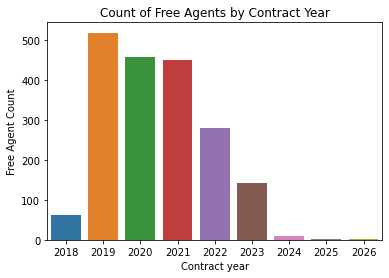

In [47]:
# creating a quick visualization of the biggest years of Free Agency from a numbers perspective

sns.barplot(data = contracts, x = 'Contract year', y = 'Free Agent Count').set(title = 'Count of Free Agents by Contract Year');

In [48]:
# filtering the data by the top 100 ranked players

top_hundred = df[df['player_rank'] <= 100]

# similar to contracts where it is entire dataset grouped by contract year and counting the amount of Free Agents per contract year, contracts_top looks at the top 100 ranked players and the biggest years of Free Agency coming

contracts_top = top_hundred.groupby('Contract year').count()['Name'].reset_index().rename({'Name' : 'Free Agent Count'}, axis = 1).sort_values(by = 'Free Agent Count', ascending = False)

In [49]:
# taking a look at this dataframe in comparison to contracts

contracts_top

,Contract year,Free Agent Count
2,2021,25
3,2022,23
1,2020,20
4,2023,19
0,2019,8
5,2024,3
6,2025,1
7,2026,1


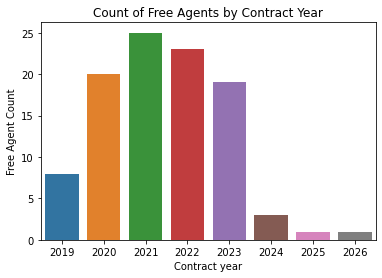

In [54]:
# visualizing the data above

sns.barplot(data = contracts_top, x = 'Contract year', y = 'Free Agent Count').set(title = 'Count of Free Agents by Contract Year');

#### Key Takeaways

+ 2021 was ranked 3 in the contracts column, but for the Top 100 Players it is ranked 1
+ 2022 was ranked 4, but 2 for the Top 100 Players
+ Most importantly, for the biggest clubs in the world from 2020 to 2023 should see a lot of players in 